# Diamond-Analysis-3


## Eval model w/ foreign inputs

The goal in this step is to integrate additional diamond data feeds and re-evaluate (1) our model and (2) the data source set for real world diamond estimation.   This new data Diamond_source2.csv comes from https://datasciencereview.com/case-study-does-the-size-of-diamonds-affect-its-price -- https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Diamond.csv



In [198]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from myutils import run_linear2
%matplotlib inline    

diamonds2 = pd.read_csv('./Diamond_source2.csv')
print(diamonds2.shape)
diamonds2.head()


(308, 6)


,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


### Eval 1. Carat linear regression


In [199]:
# train model into regr, data (original training data)
diamonds = pd.read_csv('diamonds-1a.csv')
diamonds = shuffle(diamonds, random_state=0)   # is this a repeatable shuffle by defautl w/o param
data = diamonds['carat'].to_frame()
target = diamonds['price'].to_frame()
regr = run_linear2(data, target, viz=False, log=False)

# eval w/ new data
diamonds2 = pd.read_csv('./Diamond_source2.csv')
print(diamonds2.head())

# col cleanup
price = diamonds2['price'].to_frame()
newdata = diamonds2['carat'].to_frame()
print('newdata',newdata.head())
print(newdata.columns)
print(data.columns)

diamonds_y_pred = regr.predict(newdata)

g = pd.DataFrame(diamonds_y_pred, columns=['predict'])
g['actual'] = price
g['carat'] = newdata
g['diff'] = g['actual'] - g['predict']
g['diff%'] = (abs(g['actual'] - g['predict'] ) / abs(g['actual'])) * 100

print('Score: ', regr.score(newdata, price))

g.sample(n=5, random_state=8)


Score:  0.9187743277836133
   Unnamed: 0  carat colour clarity certification  price
0           1   0.30      D     VS2           GIA   1302
1           2   0.30      E     VS1           GIA   1510
2           3   0.30      G    VVS1           GIA   1510
3           4   0.30      G     VS1           GIA   1260
4           5   0.31      D     VS1           GIA   1641
newdata    carat
0   0.30
1   0.30
2   0.30
3   0.30
4   0.31
Index(['carat'], dtype='object')
Index(['carat'], dtype='object')
Score:  0.3030127734179965


,predict,actual,carat,diff,diff%
132,5577.733410,9853,1.01,4275.266590,43.390506
207,924.062851,1506,0.41,581.937149,38.641245
258,3406.020482,5333,0.73,1926.979518,36.133124
107,3561.142834,4667,0.75,1105.857166,23.695247
253,3173.336954,5510,0.70,2336.663046,42.407678


## Predictions and Score is shockingly low....  30%  

But I think this new data is totally different since 1carat avg is totally different.  Did Kaggle give fake data, or is the other source fake data?   Below mean is skewed so low with Kaggle data that it underperforms on this new data


In [200]:
print('means: ', diamonds.loc[diamonds['carat'] == 1]['price'].mean(), ' vs ', diamonds2.loc[diamonds2['carat'] == 1]['price'].mean())
print('min: ', diamonds.loc[diamonds['carat'] == 1]['price'].min(), ' vs ', diamonds2.loc[diamonds2['carat'] == 1]['price'].min())
print('max: ', diamonds.loc[diamonds['carat'] == 1]['price'].max(), ' vs ', diamonds2.loc[diamonds2['carat'] == 1]['price'].max())
print('std: ', diamonds.loc[diamonds['carat'] == 1]['price'].std(), ' vs ', diamonds2.loc[diamonds2['carat'] == 1]['price'].std())

diamonds.loc[diamonds['carat'] == 1]['price'].describe()


means:  5243.005141388175  vs  10188.8125
min:  1681  vs  7818
max:  16469  vs  15582
std:  1604.0840477131762  vs  1908.05103126285


count     1556.000000
mean      5243.005141
std       1604.084048
min       1681.000000
25%       4155.000000
50%       4864.000000
75%       6079.000000
max      16469.000000
Name: price, dtype: float64

Hmm is it even worth continuing.. to do multiple linear or tree eval... ?  **probably not**
But lets try multiple linear w/ color, etc features added


retrain original model w/o cut__ feature
Score:  0.9756642206879115


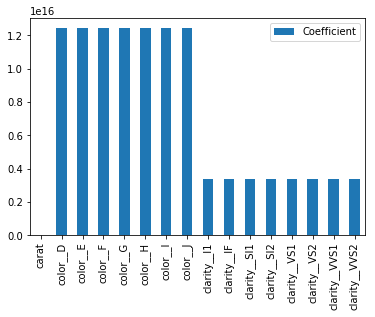

Mean squared error: 212222.35
Variance score: 0.98
       carat  color__D  color__E  color__F  color__G  color__H  color__I  \
14650   1.31         0         0         0         0         0         1   
52416   0.71         0         0         0         1         0         0   

       color__J  clarity__I1  clarity__IF  clarity__SI1  clarity__SI2  \
14650         0            0            0             0             1   
52416         0            0            0             1             0   

       clarity__VS1  clarity__VS2  clarity__VVS1  clarity__VVS2  
14650             0             0              0              0  
52416             0             0              0              0  
    actual  predict   diff      diff%
3   6296.0     5916  380.0   6.035578
16  2886.0     2513  373.0  12.924463
6   1848.0     1999 -151.0   8.170996
10  9404.0     9005  399.0   4.242875
2   7212.0     6817  395.0   5.476983
14  9376.0     9405  -29.0   0.309300
4    432.0      552 -120.0  27.77777

,predict,actual,carat,diff,diff%
132,6480.0,9853,1.01,3373.0,34.233228
207,718.0,1506,0.41,788.0,52.324037
258,3912.0,5333,0.73,1421.0,26.645415
107,3732.0,4667,0.75,935.0,20.034283
253,4236.0,5510,0.70,1274.0,23.121597


In [210]:
#(Not including Cut)
diamonds = pd.read_csv('diamonds-1a.csv')
diamonds = shuffle(diamonds, random_state=0)   # is this a repeatable shuffle by defautl w/o param
data = diamonds.drop(columns=['price','Unnamed: 0','cut__Fair','cut__Good','cut__Ideal','cut__Premium','cut__Very Good'])

# retrain model w/o cut__XYZ
target = diamonds['price'].to_frame()
print('retrain original model w/o cut__ feature')
regr = run_linear2(data, target, viz=True, log=True)

# eval w/ new data
diamonds2 = pd.read_csv('./Diamond_source2.csv')
#print(diamonds2.head())

# encoded columns
diamonds2 = diamonds2.join(pd.get_dummies(diamonds2['colour'], prefix='color_'))
diamonds2 = diamonds2.join(pd.get_dummies(diamonds2['clarity'], prefix='clarity_'))

# col cleanup
price = diamonds2['price'].to_frame()
diamonds2 = diamonds2.drop(columns=['price','colour','clarity','certification','Unnamed: 0'])
# diamonds2.insert(1,'cut__Fair',0)
# diamonds2.insert(2,'cut__Good',0)
# diamonds2.insert(3,'cut__Ideal',0)
# diamonds2.insert(4,'cut__Premium',0)
# diamonds2.insert(5,'cut__Very Good',0)
diamonds2.insert(7,'color__J',0)
diamonds2.insert(8,'clarity__I1',0)
diamonds2.insert(10,'clarity__SI1',0)
diamonds2.insert(11,'clarity__SI2',0)

# print('input',diamonds2.columns)
# print('ref',data.columns)

diamonds_y_pred = regr.predict(diamonds2)
print(diamonds_y_pred.shape)

g = pd.DataFrame(diamonds_y_pred, columns=['predict'])
g['actual'] = price
g['carat'] = diamonds2['carat']
g['diff'] = g['actual'] - g['predict']
g['diff%'] = (abs(g['actual'] - g['predict'] ) / abs(g['actual'])) * 100

print('Score: ', regr.score(diamonds2, price))

g.sample(n=5, random_state=8)


retrain original model w/o cut__ feature
Score:  0.9760420391678098


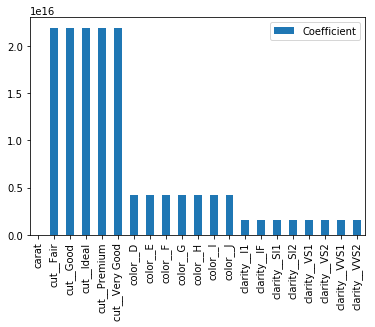

Mean squared error: 208927.55
Variance score: 0.98
       carat  cut__Fair  cut__Good  cut__Ideal  cut__Premium  cut__Very Good  \
14650   1.31          0          0           0             0               1   
52416   0.71          0          0           1             0               0   

       color__D  color__E  color__F  color__G  ...  color__I  color__J  \
14650         0         0         0         0  ...         1         0   
52416         0         0         0         1  ...         0         0   

       clarity__I1  clarity__IF  clarity__SI1  clarity__SI2  clarity__VS1  \
14650            0            0             0             1             0   
52416            0            0             1             0             0   

       clarity__VS2  clarity__VVS1  clarity__VVS2  
14650             0              0              0  
52416             0              0              0  

[2 rows x 21 columns]
    actual  predict   diff      diff%
3   6312.0     5916  396.0   6.27376

,predict,actual,carat,diff,diff%
132,-2.193928e+16,9853,1.01,2.193928e+16,2.226660e+14
207,-2.193928e+16,1506,0.41,2.193928e+16,1.456791e+15
258,-2.193928e+16,5333,0.73,2.193928e+16,4.113872e+14
107,-2.193928e+16,4667,0.75,2.193928e+16,4.700938e+14
253,-2.193928e+16,5510,0.70,2.193928e+16,3.981720e+14


In [211]:
# (including Cut which are all 0's drives model into negative ???)
diamonds = pd.read_csv('diamonds-1a.csv')
diamonds = shuffle(diamonds, random_state=0)   # is this a repeatable shuffle by defautl w/o param
data = diamonds.drop(columns=['price','Unnamed: 0'])

# cleanup mismatched reference cols
target = diamonds['price'].to_frame()
print('retrain original model w/o cut__ feature')
regr = run_linear2(data, target, viz=True, log=True)

# eval w/ new data
diamonds2 = pd.read_csv('./Diamond_source2.csv')
#print(diamonds2.head())

# encoded columns
diamonds2 = diamonds2.join(pd.get_dummies(diamonds2['colour'], prefix='color_'))
diamonds2 = diamonds2.join(pd.get_dummies(diamonds2['clarity'], prefix='clarity_'))

# col cleanup
price = diamonds2['price'].to_frame()
diamonds2 = diamonds2.drop(columns=['price','colour','clarity','certification','Unnamed: 0'])
diamonds2.insert(1,'cut__Fair',0)
diamonds2.insert(2,'cut__Good',0)
diamonds2.insert(3,'cut__Ideal',0)
diamonds2.insert(4,'cut__Premium',0)
diamonds2.insert(5,'cut__Very Good',0)
diamonds2.insert(12,'color__J',0)
diamonds2.insert(13,'clarity__I1',0)
diamonds2.insert(15,'clarity__SI1',0)
diamonds2.insert(16,'clarity__SI2',0)

print('input',diamonds2.columns)
print('ref',data.columns)

diamonds_y_pred = regr.predict(diamonds2)
print(diamonds_y_pred.shape)

g = pd.DataFrame(diamonds_y_pred, columns=['predict'])
g['actual'] = price
g['carat'] = diamonds2['carat']
g['diff'] = g['actual'] - g['predict']
g['diff%'] = (abs(g['actual'] - g['predict'] ) / abs(g['actual'])) * 100

print('Score: ', regr.score(diamonds2, price))

g.sample(n=5, random_state=8)


### 62% thats not horrible.... its alot better than 30% so its semi-promising


## Try BlueNile Data Instead..

I scraped some data from bluenile.com which has a massive dataset -- just requires stealth scraping.  I used some libraries from http://amarder.github.io/post/diamonds/ and made changes to work w/ apparently recent changes to the bluenile site.



In [176]:
diamonds3 = pd.read_csv('./diamonds1carat.csv')
print(diamonds3.shape)
print(diamonds3.columns)

# trim down to cols we need
diamonds3a = diamonds3[['carat','price','clarity','color','cut']]   # copy warning

# cleanup the cols embedded w/ arrays
def cleanBracketsToF(x):
    return float(cleanBracketsToS(x))

def cleanBracketsToS(x):
    return x.replace("['",'').replace("']",'')

def cleanCut(str):
    return str[str.index('label') + 9: str.index('labelSmall')-4]

diamonds3a.loc[:,'carat'] = diamonds3a.loc[:,'carat'].to_frame().applymap(cleanBracketsToF)
diamonds3a.loc[:,'clarity'] = diamonds3a.loc[:,'clarity'].to_frame().applymap(cleanBracketsToS)
diamonds3a.loc[:,'color'] = diamonds3a.loc[:,'color'].to_frame().applymap(cleanBracketsToS)
diamonds3a.loc[:,'cut'] = diamonds3a.loc[:,'cut'].to_frame().applymap(cleanCut)

print(diamonds3a.describe())
print(diamonds3a.head())



(12631, 27)
Index(['detailsPageUrl', 'carat', 'date', 'dateSet', 'price', 'pricePerCarat',
       'skus', 'id', 'shapeCode', 'shapeName', 'clarity', 'color', 'culet',
       'cut', 'depth', 'fluorescence', 'lxwRatio', 'polish', 'symmetry',
       'table', 'hasVisualization', 'visualizationImageUrl', 'v360BaseUrl',
       'measurements', 'willArriveForHoliday', 'imageUrl', 'sellingIndex'],
      dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


              carat         price
count  12631.000000  12631.000000
mean       0.982802   5403.485551
std        0.042518   1653.060573
min        0.900000   1451.000000
25%        1.000000   4165.000000
50%        1.000000   5197.000000
75%        1.010000   6368.500000
max        1.100000  15225.000000
   carat  price clarity color        cut
0    0.9   1451     SI2     K       Good
1    0.9   1632     SI2     K       Good
2    0.9   1720     VS2     K       Good
3    0.9   1923     SI2     K  Very Good
4    0.9   1941     SI1     K       Good


### Eval 2. Carat linear regression (w/ Blue Nile Data for 1k)


In [177]:

price = diamonds3a['price'].to_frame()
newdata = diamonds3a['carat'].to_frame()
diamonds_y_pred = regr.predict(newdata)

g = pd.DataFrame(diamonds_y_pred, columns=['predict'])
g['actual'] = price
g['carat'] = newdata
g['diff'] = g['actual'] - g['predict']
g['diff%'] = (abs(g['actual'] - g['predict'] ) / abs(g['actual'])) * 100

print('Score: ', regr.score(newdata, price))

g.sample(n=5, random_state=8)

ValueError: shapes (12631,1) and (16,1) not aligned: 1 (dim 1) != 16 (dim 0)

In [ ]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from myutils import run_linear2
%matplotlib inline    

diamonds3b = pd.read_csv('./diamonds1carat.csv')
print(diamonds3b.head())

# col cleanup
colors = pd.get_dummies( diamonds3b['color'], prefix='color_')
clarity = pd.get_dummies( diamonds3b['clarity'], prefix='clarity_')
price = diamonds2['price'].to_frame()
diamonds3b = diamonds3b.join(colors).join(clarity)
diamonds3b = diamonds3b.drop(columns=['price','color','clarity','certification','Unnamed: 0'])
print(diamonds3b.head())

# zero filling the extra cols
diamonds3b.insert(1,'cut__Very Good',0)
diamonds3b.insert(1,'cut__Premium',0)
diamonds3b.insert(1,'cut__Ideal',0)
diamonds3b.insert(1,'cut__Good',0)
diamonds3b.insert(1,'cut__Fair',0)
diamonds3b.insert(12,'color__J',0)
diamonds3b.insert(13,'clarity__I1',0)
diamonds3b.insert(15,'clarity__SI2',0)
diamonds3b.insert(15,'clarity__SI1',0)
print(diamonds3b.head())
print(diamonds3b.columns)
print(data.columns)

# diamonds_y_pred = regr.predict(diamonds2)
# res = pd.DataFrame(diamonds_y_pred)
# res['actual'] = price

# print('Score: ', regr.score(diamonds2, price))

#Y = regr.predict(X)
